In [1]:
!pip install torch==1.13.1 torchvision -f https://download.pytorch.org/whl/cu102/torch_stable.html

import torch
import torchvision
import torchaudio

print("Torch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("Torchaudio version:", torchaudio.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu102/torch_stable.html
Torch version: 1.13.1+cu116
Torchvision version: 0.14.1+cu116
Torchaudio version: 0.13.1+cu116


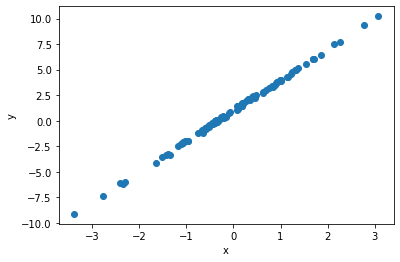

Epoch [10/100], Loss: 9.2000
Epoch [20/100], Loss: 5.5329
Epoch [30/100], Loss: 3.3317
Epoch [40/100], Loss: 2.0096
Epoch [50/100], Loss: 1.2149
Epoch [60/100], Loss: 0.7369
Epoch [70/100], Loss: 0.4491
Epoch [80/100], Loss: 0.2757
Epoch [90/100], Loss: 0.1711
Epoch [100/100], Loss: 0.1079
R^2 Score: 0.9906


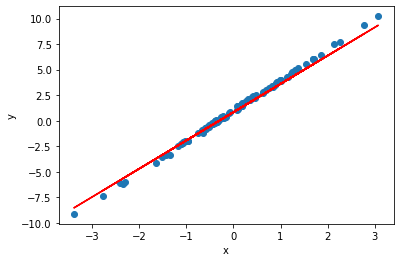

R^2 Score: 0.9906


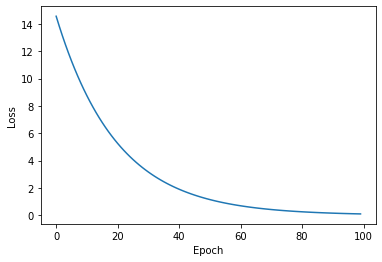

Model saved to linear_regression_model.pt
Model loaded from linear_regression_model.pt


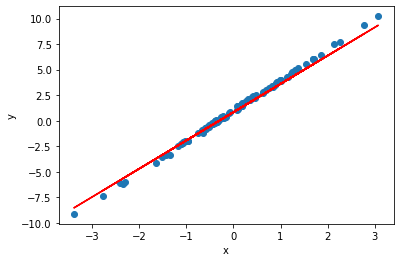

Show the information of the original model
Linear(in_features=1, out_features=1, bias=True)
Model parameters:
weight: torch.Size([1, 1])
bias: torch.Size([1])
Show the information of the loaded_model
Linear(in_features=1, out_features=1, bias=True)
Model parameters:
weight: torch.Size([1, 1])
bias: torch.Size([1])
Comparing the parameters of the two models:
weight: original - Parameter containing:
tensor([[2.7697]], requires_grad=True) 
 loaded - tensor([[2.7697]])
bias: original - Parameter containing:
tensor([0.8327], requires_grad=True) 
 loaded - tensor([0.8327])


In [2]:
import torch
import matplotlib.pyplot as plt

def create_dataset(num_samples, num_features):
    x = torch.randn(num_samples, num_features)
    y = 3 * x + 1 + torch.randn(num_samples, num_features) * 0.1
    return x, y

def create_linear_regression_model(num_features):
    return torch.nn.Linear(num_features, num_features)

def train_model(model, x, y, num_epochs, learning_rate):
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    loss_list = []

    for epoch in range(num_epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    return loss_list

def plot_data(x, y, y_pred):
    plt.scatter(x, y)
    if y_pred is not None:
        plt.plot(x, y_pred, color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


def plot_loss(loss_list):
    plt.plot(range(len(loss_list)), loss_list)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

def save_model(model, file_path):
    torch.save(model.state_dict(), file_path)
    print(f'Model saved to {file_path}')

def load_model(num_features, file_path):
    model = create_linear_regression_model(num_features)
    model.load_state_dict(torch.load(file_path))
    model.eval()
    print(f'Model loaded from {file_path}')
    return model

def show_model_info(model):
    print(model)
    print('Model parameters:')
    for name, param in model.named_parameters():
        print(f'{name}: {param.size()}')

def compare_models(model, loaded_model):
  for name, param in model.named_parameters():
    print(f'{name}: original - {param} \n loaded - {loaded_model.state_dict()[name]}')

# 1. Create a supervised linear regression dataset
num_samples = 100
num_features = 1
x, y = create_dataset(num_samples, num_features)

# 2. Plot the relationship
plot_data(x, y, None)

# 3. Create the linear regression model
model = create_linear_regression_model(num_features)

# 4. Train the model
num_epochs = 100
learning_rate = 0.01
loss_list = train_model(model, x, y, num_epochs, learning_rate)

# 5. Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(x)
    r2_score = 1 - loss_list[-1] / torch.var(y)
    print(f'R^2 Score: {r2_score:.4f}')

# 6. Visualize the dataset and the prediction line
plot_data(x, y, y_pred)

# 7. Calculate the R^2 score
print(f'R^2 Score: {r2_score:.4f}')

# 8. Plot the loss over epochs
plot_loss(loss_list)

# 9. Save the model
file_path = 'linear_regression_model.pt'
save_model(model, file_path)

# 10. Load the model and make predictions
loaded_model = load_model(num_features, file_path)
loaded_model.eval()
with torch.no_grad():
    y_pred_loaded = loaded_model(x)
    r2_score = 1 - loss_list[-1] / torch.var(y)

# 11. Visualize the dataset and the prediction line
plot_data(x, y, y_pred_loaded)

# 11. Show the information of the original model
print("Show the information of the original model")
show_model_info(model)

# 12. Show the information of the loaded_model
print("Show the information of the loaded_model")
show_model_info(loaded_model)

# 13. Compare the parameters of the two models
print("Comparing the parameters of the two models:")
compare_models(model, loaded_model)